# Research Notebook

In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


<Axes: >

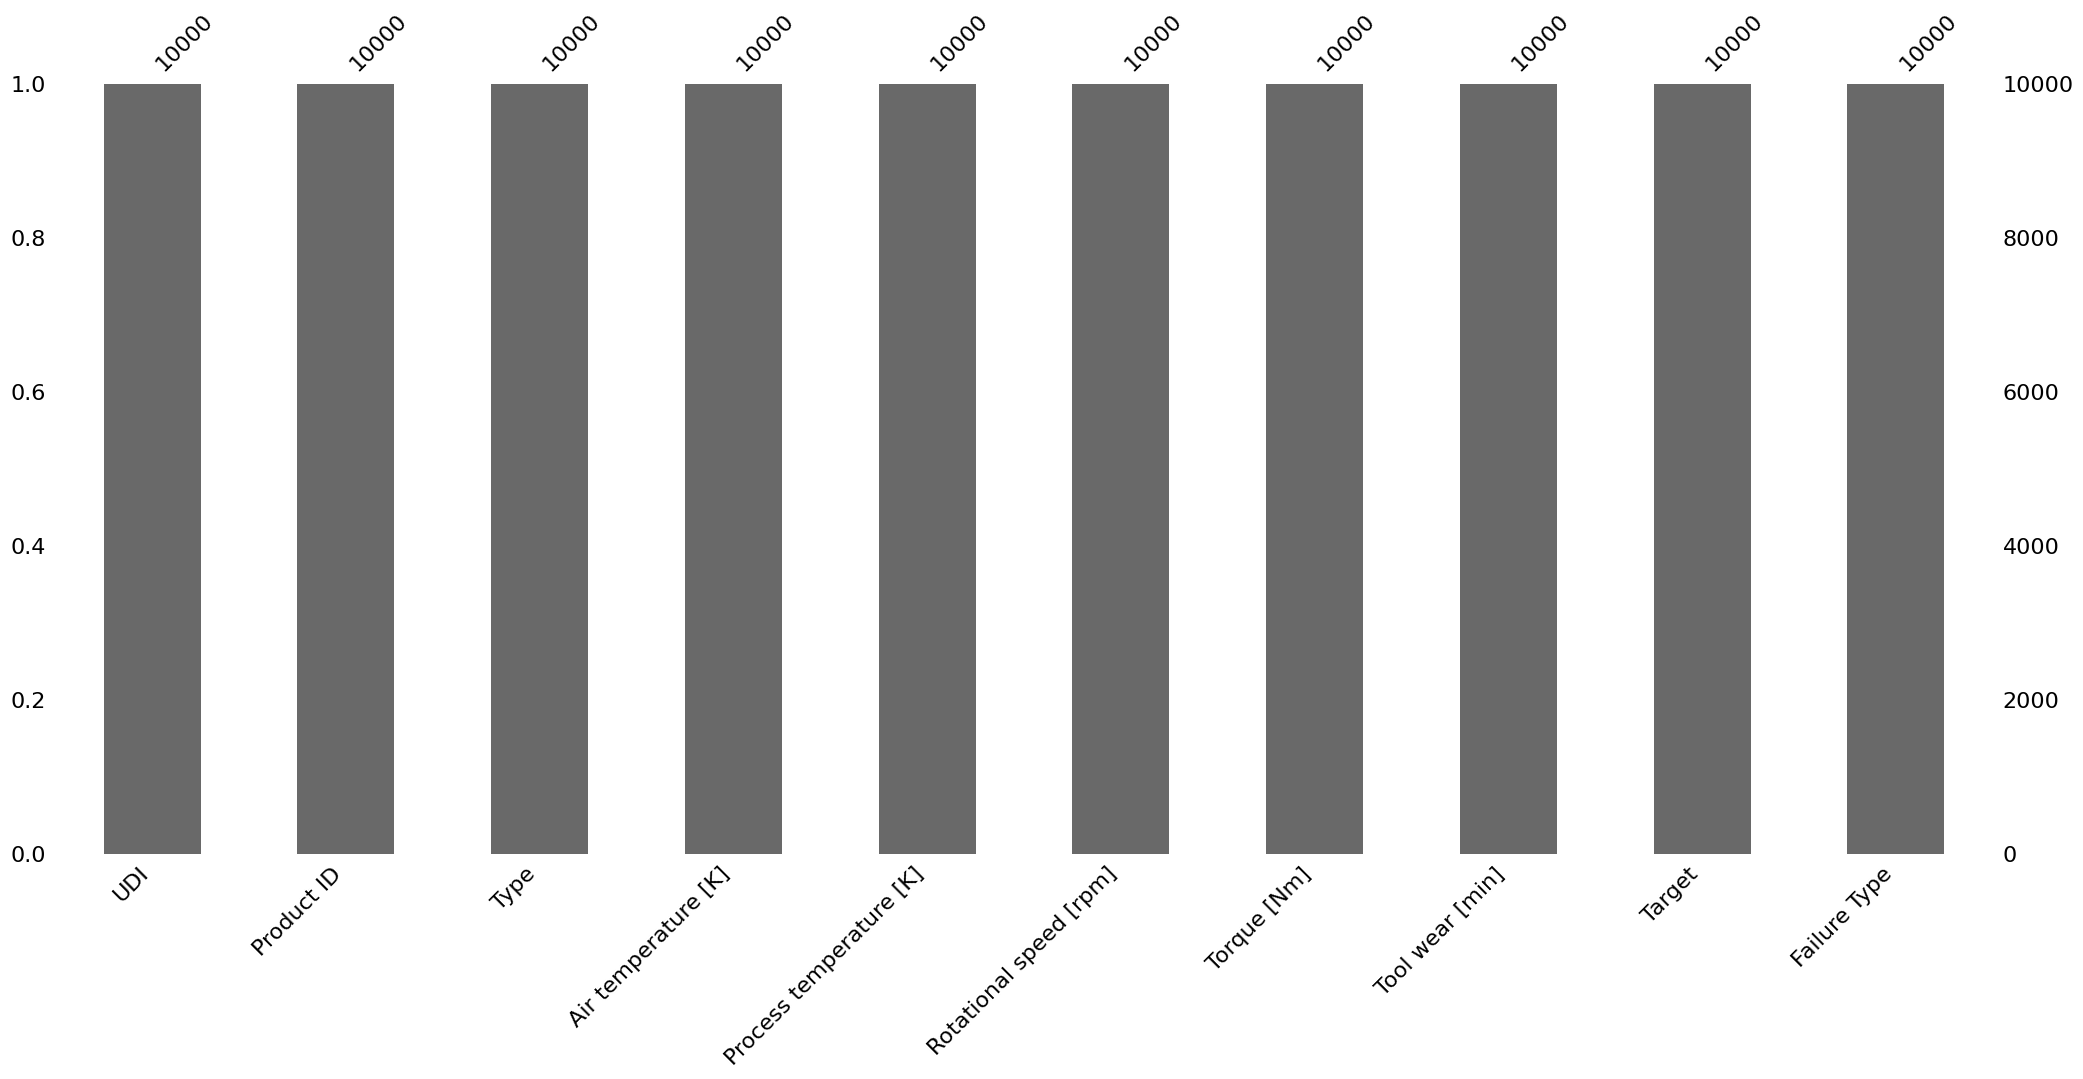

In [20]:
import missingno as mno
mno.bar(df)

No missing values seen

In [21]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [22]:
# Removing unnecessary columns :
df = df.drop(['UDI','Product ID','Type'],axis=1)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,298.1,308.6,1551,42.8,0,0,No Failure
1,298.2,308.7,1408,46.3,3,0,No Failure
2,298.1,308.5,1498,49.4,5,0,No Failure
3,298.2,308.6,1433,39.5,7,0,No Failure
4,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure
9996,298.9,308.4,1632,31.8,17,0,No Failure
9997,299.0,308.6,1645,33.4,22,0,No Failure
9998,299.0,308.7,1408,48.5,25,0,No Failure


In [23]:
X = df.drop(['Failure Type'],axis=1)
y = df['Failure Type']

In [24]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [25]:
y

0       No Failure
1       No Failure
2       No Failure
3       No Failure
4       No Failure
           ...    
9995    No Failure
9996    No Failure
9997    No Failure
9998    No Failure
9999    No Failure
Name: Failure Type, Length: 10000, dtype: object

In [14]:
y.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [15]:
y = y.map(
    {
        'No Failure':0,
        'Heat Dissipation Failure':1,
        'Power Failure':2,
        'Overstrain Failure':3,
        'Tool Wear Failure':4,
        'Random Failure':5
    }
)
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Failure Type, Length: 10000, dtype: float64

In [16]:
y.value_counts()


0.0    9652
1.0     112
2.0      95
3.0      78
4.0      45
Name: Failure Type, dtype: int64

In [17]:
y = y.astype('int')
y

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer